In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import datetime
from bs4 import BeautifulSoup
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
import pandas_datareader as dr

In [2]:
#Get's the Stock Sticker the user wants
user_stock = input("Pick a Dividend Paying Stock's Ticker Symbol: ")
#Make if else statement that only accepts kings or aristocrates
user_stock = user_stock.upper()


Pick a Dividend Paying Stock's Ticker Symbol: pep


In [3]:
#Gets stock price over a certain of time the user wants

start_time = input('What is the Start Time for Stock Prices (Use Year/Month/Day Format): ') 
end_time  = input('What is the End Time for Stock Prices (Use Year/Month/Day Format): ')

start_time2 = pd.to_datetime(start_time,yearfirst = True)
end_time2 = pd.to_datetime(start_time,yearfirst = True)

start_time2 = str(start_time2)
end_time2 = str(end_time2)

stock_prices = dr.get_data_yahoo('{}'.format(user_stock), start = '{}'.format(start_time),end = '{}'.format(end_time))
stock_prices

What is the Start Time for Stock Prices (Use Year/Month/Day Format): 2018/07/5
What is the End Time for Stock Prices (Use Year/Month/Day Format): 2019/07/5


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-05,109.620003,108.000000,108.910004,109.550003,4870400.0,106.151085
2018-07-06,110.019997,108.970001,109.489998,109.559998,4387300.0,106.160774
2018-07-09,109.300003,107.519997,109.129997,107.760002,7866400.0,104.416618
2018-07-10,113.000000,109.680000,110.620003,112.889999,16107200.0,109.387451
2018-07-11,112.940002,112.099998,112.639999,112.540001,5521400.0,109.048317
2018-07-12,112.709999,110.970001,112.540001,111.529999,5500100.0,108.069649
2018-07-13,112.790001,111.620003,111.680000,112.690002,4417100.0,109.193657
2018-07-16,113.120003,111.750000,112.559998,112.959999,5413600.0,109.455284
2018-07-17,115.029999,113.470001,113.470001,114.879997,6783800.0,111.315704


In [4]:
#This function removes the , and make the numbers into integers, good for future use     
def remove_comma_make_integer(x,y):
    for value in x:
        value = value.replace(',','')
        value = int(value)
        y.append(value)
    return y

In [5]:
def make_ratio(first_list,second_list,empty_list):
    for inte in range(4):
        tempRatio = round((first_list[inte]/second_list[inte]),3)
        empty_list.append(tempRatio)
        
    return empty_list

In [6]:
def Second_make_ratio(first_list,second_list,empty_list):
    for inte in range(5):
        tempRatio = round((first_list[inte]/second_list[inte]),3)
        empty_list.append(tempRatio)
        
    return empty_list

In [7]:
def pricegraph_dec(x):
    Sword = '{}'.format(x)
    plt.title(Sword+' Stock Price Over time')
    plt.xlabel('Dates')
    plt.ylabel('Prices')

In [8]:
def balance_sheet_single_graph(x,years,name):
    plt.title('{}'.format(name))
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.bar(years,x,color = 'darkgreen')
    

In [9]:
def hundred_multiplier(the_list,empty):
    for i in the_list:
        i2 = round((i * 100),3)
        empty.append(i2)
    return empty

In [10]:
def remove_final_letter(the_list,empty_list):
    for i in the_list:
        if(i.endswith(')') == True):
            i = i.strip('()')
            i = '-' + i
        if(i.endswith('B') == True):
            multiplier = 1000000000
        else:
            multiplier = 1000000
        i2 = i[:-1]
        i3 = round((float(i2) * multiplier),5)
        empty_list.append(i3)
    return empty_list

In [11]:
#Web Scrapes the Balance Sheet that is for Annual Data

#Requests balance sheet data from yahoo finance

bs_search = 'https://finance.yahoo.com/quote/{0}/balance-sheet?p={0}'.format(user_stock)
balance_sheet_source = requests.get(bs_search).text

#Gets the unparsed balance sheet 

balance_sheet_soup = BeautifulSoup(balance_sheet_source,'lxml')
##print(balance_sheet_soup.prettify()) ; prints whole html code for the webpage that has the balance sheet
balance_sheet = balance_sheet_soup.find('table',class_ = 'Lh(1.7) W(100%) M(0)')
##print(balance_sheet.prettify()) ; 

#Finds the Years on the Balance Sheet, a pattern was found!; remeber that the most current year is index 0

t_years = []

for i in  balance_sheet.find_all('td',class_ ='C($gray) Ta(end)'):
    years = i.span.text
    t_years.append(years)

t_years = pd.to_datetime(t_years)

#Finds the Current Assets

t_currentAssets = []

for i2 in balance_sheet.find_all('td',class_ = 'Fw(600) Fz(s) Ta(end)'):
    currentAssets = i2.span.text
    t_currentAssets.append(currentAssets)
    
ca = []

for casset in t_currentAssets:
    casset = casset.replace(',','')
    casset = int(casset)
    ca.append(casset)
        
#Finds the Total Assets,Total Liabilities, and Net Tangible Assets for latest years

t_Assets = []

for i3 in balance_sheet.find_all('td',class_ = 'Fw(600) Fz(s) Ta(end) Pb(20px)'):
    totalAssets = i3.span.text
    t_Assets.append(totalAssets)
    
TotalAssets = t_Assets[0:4]
TotalLiabilities = t_Assets[4:8]
NetTangibleAssets = t_Assets[8:12]

ta = []
tl = []

tass = remove_comma_make_integer(TotalAssets,ta) 
tlia = remove_comma_make_integer(TotalLiabilities,tl)

#Finds Current Liabilities

cl = []
CurrentLiabilities = 0

for i4 in balance_sheet.find_all('td',class_ = 'Fw(600) Fz(s) Ta(end) Py(8px)'):
    CurrentLiabilities = i4.span.text
    cl.append(CurrentLiabilities)
    
useless = []
currentl = remove_comma_make_integer(cl,useless)
      
#Finds Stock Holder Equity

she = []
xvalue = 0

for i5 in balance_sheet.find_all('td',class_ = 'Fz(s) Ta(end) Pstart(10px)'):
    xvalue = i5.span
    she.append(xvalue)
    
first_ste = she[112].text
second_ste = she[113].text
third_ste = she[114].text
last_ste = she[115].text

stockHolderEquity = [first_ste,second_ste,third_ste,last_ste]

useless2 = []

StockHolderEquity = remove_comma_make_integer(stockHolderEquity,useless2)

#Finds Cash and Cash Equivalents

cash_e1 = she[0].text
cash_e2 = she[1].text
cash_e3 = she[2].text
cash_e4 = she[3].text

cash_e = [cash_e1,cash_e2,cash_e3,cash_e4]

useless3 = []

CashEquivalents = remove_comma_make_integer(cash_e,useless3)

#Finds Long Term Debt

LongDebt1 = she[60].text
LongDebt2 = she[61].text
LongDebt3 = she[62].text
LongDebt4 = she[63].text

LongDebt = [LongDebt1,LongDebt2,LongDebt3,LongDebt4]

useless4 = []

Long_Debt = remove_comma_make_integer(LongDebt,useless4)

#Finds Inventory

try:
    inventory1 = she[12].text
except Exception:
    inventory1 = ',0'
try:
    inventory2 = she[13].text
except Exception:
    inventory2 = ',0'
try:
    inventory3 = she[14].text
except Exception:
    inventory3 = ',0'
try:
    inventory4 = she[15].text
except Exception:
    inventory4 = ',0'

inventory = [inventory1,inventory2,inventory3,inventory4]

useless5 = []

Inventory = remove_comma_make_integer(inventory,useless5)

#Finds Accounts Payable 

ap1 = she[48].text
ap2 = she[49].text
ap3 = she[50].text
ap4 = she[51].text

ap = [ap1,ap2,ap3,ap4]

useless6 = []

Acc_Pay = remove_comma_make_integer(ap,useless6)

#Finds Net Receivables

try: 
    netr1 = she[8].text
except Exception:
    netr1 = ',0'
try: 
    netr2 = she[9].text
except Exception:
    netr2 = ',0'       
try:
    netr3 = she[10].text
except Exception:
    netr3 = ',0'
try:
    netr4 = she[11].text
except Exception:
    netr4 = ',0'

net_receivables = [netr1,netr2,netr3,netr4]

useless7 = []

NetReceivables = remove_comma_make_integer(net_receivables,useless7)

#Short Term Debt

try:
    stdebt1 = she[52].text
except Exception:
    stdebt1 = ',0'
try:
    stdebt2 = she[53].text
except Exception:
    stdebt2 = ',0'
try :
    stdebt3 = she[54].text
except Exception:
    stdebt3 = ',0'
#There was a stock(MO) that does not have a value for theshort term debt for third year, so used try and except, if
#there is a 0, it means there is not a reported short term debt reported
try:
    stdebt4 = she[55].text
except Exception:
    stdebt4 = ',0'

short_term_debt = [stdebt1,stdebt2,stdebt3,stdebt4]

useless8 = []

ShortTermDebt = remove_comma_make_integer(short_term_debt,useless8)

#Current Ratio over the Years (Current Assets/ Current Liabilities)

curr_Ratio = []

Curr_Ratio = make_ratio(ca,currentl,curr_Ratio)
    
#Debt Ratio over the Years

deb_ratio = []

deb_Ratio = make_ratio(tlia,tass,deb_ratio)
    
#Debt to Equity Ratio (Total Liabilities/TotalStockHolderEquity)

equity_ratio = []

Equity_Ratio = make_ratio(tlia,StockHolderEquity,equity_ratio)

#DataFrame, gathers the bits of the Blance sheet to make our ratios for Dividend Investors 

df_b = {'Year':[t_years[0],t_years[1],t_years[2],t_years[3]],
        'Total_Liabilities':[tlia[0],tlia[1],tlia[2],tlia[3]],
       'Total_Assets':[tass[0],tass[1],tass[2],tass[3]],
       'Current_Liabilities':[currentl[0],currentl[1],currentl[2],currentl[3]],
        'Current_Assets':[ca[0],ca[1],ca[2],ca[3]],
       'Total_Stockholder_Equity':[StockHolderEquity[0],StockHolderEquity[1],StockHolderEquity[2],StockHolderEquity[3]],
       'Cash_and_Equivalents':[CashEquivalents[0],CashEquivalents[1],CashEquivalents[2],CashEquivalents[3]],
       'Long_Term_Debt':[Long_Debt[0],Long_Debt[1],Long_Debt[2],Long_Debt[3]],
        'Inventory':[Inventory[0],Inventory[1],Inventory[2],Inventory[3]],
        'Accounts_Payble': [Acc_Pay[0],Acc_Pay[1],Acc_Pay[2],Acc_Pay[3]],
        'Net_Receivables': [NetReceivables[0],NetReceivables[1],NetReceivables[2],NetReceivables[3]],
        'Short_Term_Debt':[ShortTermDebt[0],ShortTermDebt[1],ShortTermDebt[2],ShortTermDebt[3]],
       'Current_Ratio':[Curr_Ratio[0],Curr_Ratio[1],Curr_Ratio[2],Curr_Ratio[3]],
       'Debt_Ratio': [deb_Ratio[0],deb_Ratio[1],deb_Ratio[2],deb_Ratio[3]],
       'Debt_to_Equity_Ratio':[Equity_Ratio[0],Equity_Ratio[1],Equity_Ratio[2],Equity_Ratio[3]]}

balance_sheet_dataframe = pd.DataFrame(df_b)
print(balance_sheet_dataframe)

        Year  Total_Liabilities  Total_Assets  Current_Liabilities  \
0 2018-12-29           63046000      77648000             22138000   
1 2017-12-30           68823000      79804000             20502000   
2 2016-12-31           62291000      73490000             21135000   
3 2015-12-26           57637000      69667000             17578000   

   Current_Assets  Total_Stockholder_Equity  Cash_and_Equivalents  \
0        21893000                  14518000               8721000   
1        31027000                  11045000              10610000   
2        26450000                  11246000               9158000   
3        23031000                  12068000               9096000   

   Long_Term_Debt  Inventory  Accounts_Payble  Net_Receivables  \
0        28295000    3128000          7213000          7142000   
1        33796000    2947000          6727000          7024000   
2        30053000    2723000          6158000          6694000   
3        29592000    2720000          5

In [12]:
#Requests Data for CashFlow Statement

cf_search = 'https://finance.yahoo.com/quote/{0}/cash-flow?p={0}'.format(user_stock)
cash_flow_source = requests.get(cf_search).text

cash_flow_soup = BeautifulSoup(cash_flow_source,'lxml')
cash_flow = cash_flow_soup.find('table',class_ = 'Lh(1.7) W(100%) M(0)')

#Collects the Annual dates
cash_flow_years = []
for i in  cash_flow.find_all('td',class_ ='C($gray) Ta(end)'):
    yearCashFlow = i.span.text
    cash_flow_years.append(yearCashFlow)
    
cash_flow_years = pd.to_datetime(cash_flow_years)
    
#Finds the Dividends Paid
Dividends_Paid = []
for i in cash_flow.find_all('td',class_ ='Fw(600) Fz(s) Ta(end) Pb(20px)'):
    divispaid = i.text
    Dividends_Paid.append(divispaid)

Total_Dividend_Paid = [Dividends_Paid[4],Dividends_Paid[5],Dividends_Paid[6],Dividends_Paid[7]]
Divi_Pay = []

Cash_flowOA = remove_comma_make_integer(Total_Dividend_Paid,Divi_Pay)

#Finds Total Cash Flow from Operating Acitivities
useless69 = []
for i in cash_flow.find_all('td',class_ ='Fz(s) Ta(end) Pstart(10px)'):
    cashMoney = i.text
    useless69.append(cashMoney)
    
divis = [useless69[36],useless69[37],useless69[38],useless69[39]]
useless70 = []

bigBills = remove_comma_make_integer(divis,useless70)
D_Payout = []

for i in bigBills:
    i = abs(i)
    D_Payout.append(i)

#The dataframe for cashflow data
cash_flow_dataframe = {'Years':[cash_flow_years[0],cash_flow_years[1],cash_flow_years[2],cash_flow_years[3]],
                      'Cash_Flow_Operating_Act':[Cash_flowOA[0],Cash_flowOA[1],Cash_flowOA[2],Cash_flowOA[3]],
                      'Dividends_Payed':[D_Payout[0],D_Payout[1],D_Payout[2],D_Payout[3]]}

cash_flow_dataframe = pd.DataFrame(cash_flow_dataframe)
cash_flow_dataframe

,Years,Cash_Flow_Operating_Act,Dividends_Payed
0,2018-12-29,9415000,4930000
1,2017-12-30,10030000,4472000
2,2016-12-31,10663000,4227000
3,2015-12-26,10864000,4040000


In [13]:
#Web Scrapes the Income Statement that is for Annual Data

is_search = 'https://finance.yahoo.com/quote/{0}/financials?p={0}'.format(user_stock)

Income_Statement_Annually_Source = requests.get(is_search).text

Income_Statement_Annually_Soup = BeautifulSoup(Income_Statement_Annually_Source,'lxml')

Income_Statement_Annually = Income_Statement_Annually_Soup.find('table',class_ = 'Lh(1.7) W(100%) M(0)')

#Finds the Years on the Income Statement

isa_year = []
useless8 = []

for i6 in Income_Statement_Annually.find_all('td',class_ = 'C($gray) Ta(end)'):
    isa_years = i6.span.text
    isa_year.append(isa_years)

IncomeStatementA_years = pd.to_datetime(isa_year)

#Finds the Gross Profit, Operating Income, and Annual Net Income from Continuing Ops

ISAthree = []
useless9 = []

for i7 in Income_Statement_Annually.find_all('td',class_ = 'Fw(600) Fz(s) Ta(end) Pb(20px)'):
    ISAthree2 = i7.span.text
    ISAthree.append(ISAthree2)
    
GPOPNCP = remove_comma_make_integer(ISAthree,useless9)

Gross_ProfitA = [GPOPNCP[0],GPOPNCP[1],GPOPNCP[2],GPOPNCP[3]]
Operating_IncomeorLossA = [GPOPNCP[4],GPOPNCP[5],GPOPNCP[6],GPOPNCP[7]]
Net_Income_Continuing_OpsA = [GPOPNCP[8],GPOPNCP[9],GPOPNCP[10],GPOPNCP[11]]

#Finds Net Sales/ Total Revenue; this one contains a lot of data on Income Statement and Cost of Goods Sold

ISATR = []
useless10 = []
uselesss = []

for i8 in Income_Statement_Annually.find_all('td',class_ = 'Fz(s) Ta(end) Pstart(10px)'):
    ISATR2 = i8.span
    ISATR.append(ISATR2)
    
Total_RevenueA = [ISATR[0].text,ISATR[1].text,ISATR[2].text,ISATR[3].text]
TRA = remove_comma_make_integer(Total_RevenueA,useless10)

try:
    CGSA1 = ISATR[4].text
except Exception:
    CGSA1 = ',0'
try:
    CGSA2 = ISATR[5].text
except Exception:
    CGSA2 = ',0'
try:
    CGSA3 = ISATR[6].text
except Exception:
    CGSA3 = ',0'
try: 
    CGSA4 = ISATR[7].text
except Exception:
    CGSA4 = ',0'

CGSA = [CGSA1,CGSA2,CGSA3,CGSA4]

try:
    CGSA = remove_comma_make_integer(CGSA,uselesss)
except Exception:
    pass

#Finds the Net Income

ISNI = []
useless11 = []

for i9 in Income_Statement_Annually.find_all('td',class_ = 'Fw(600) Ta(end) Py(8px) Pt(36px)'):
    ISNI2 = i9.span.text
    ISNI.append(ISNI2)
    
NetIncomeA = [ISNI[0],ISNI[1],ISNI[2],ISNI[3]]
Net_IncomeA = remove_comma_make_integer(NetIncomeA,useless11)

#Operating Profit Marging (Operating Income / Total Revenue) * 100 ; Operating_IncomeorLossA

useless12 = []
useless13 = []

OperatingProfitMargingA = make_ratio(Operating_IncomeorLossA,TRA,useless12)

OPMA = hundred_multiplier(OperatingProfitMargingA,useless13)

# Net Profit Margin (Net Income/Total Revenue) * 100

useless13 = []
useless14 = []

NPMA = hundred_multiplier(make_ratio(Net_IncomeA,TRA,useless14),useless13)

#Gross Profit Margin (Gross Profit / Total Revenue) * 100

useless15 = []
useless16 = []

GPMA = hundred_multiplier(make_ratio(Gross_ProfitA,TRA,useless15),useless16)

#Data Frame Skeleton for Annual Income Statement

skele_annual_is = {'Years':[IncomeStatementA_years[0],IncomeStatementA_years[1],IncomeStatementA_years[2],IncomeStatementA_years[3]],
                  'Gross_Profit':[Gross_ProfitA[0],Gross_ProfitA[1],Gross_ProfitA[2],Gross_ProfitA[3]],
                'Operating_Income_or_Loss':[Operating_IncomeorLossA[0],Operating_IncomeorLossA[1],Operating_IncomeorLossA[2],Operating_IncomeorLossA[3]],
                  'Net_Income_Continuing_Ops':[Net_Income_Continuing_OpsA[0],Net_Income_Continuing_OpsA[1],Net_Income_Continuing_OpsA[2],Net_Income_Continuing_OpsA[3]],
                  'Total_Revenue':[TRA[0],TRA[1],TRA[2],TRA[3]],
                   'Net_Income':[Net_IncomeA[0],Net_IncomeA[1],Net_IncomeA[2],Net_IncomeA[3]],
                  'Operting_Profit_Margin':[OPMA[0],OPMA[1],OPMA[2],OPMA[3]],
                  'Net_Profit_Margin':[NPMA[0],NPMA[1],NPMA[2],NPMA[3]],
                  'Gross_Profit_Margin':[GPMA[0],GPMA[1],GPMA[2],GPMA[3]],
                  'Cost_of_Goods_Sold':[CGSA[0],CGSA[1],CGSA[2],CGSA[3]]}

Income_StatementA = pd.DataFrame(skele_annual_is)
print(Income_StatementA)

       Years  Gross_Profit  Operating_Income_or_Loss  \
0 2018-12-29      35283000                  10625000   
1 2017-12-30      34729000                  10463000   
2 2016-12-31      34577000                  10229000   
3 2015-12-26      34325000                  10009000   

   Net_Income_Continuing_Ops  Total_Revenue  Net_Income  \
0                   12559000       64661000    12515000   
1                    4908000       63525000     4857000   
2                    6379000       62799000     6329000   
3                    5501000       63056000     5452000   

   Operting_Profit_Margin  Net_Profit_Margin  Gross_Profit_Margin  \
0                    16.4               19.4                 54.6   
1                    16.5                7.6                 54.7   
2                    16.3               10.1                 55.1   
3                    15.9                8.6                 54.4   

   Cost_of_Goods_Sold  
0            29378000  
1            28796000  
2    

In [14]:
#Web Scrapes the Income Statement that is for the past 4 Quarters Data
isq_search = 'https://www.marketwatch.com/investing/stock/{0}/financials/income/quarter'.format(user_stock)

Income_Statement_Annually_SourceQ = requests.get(isq_search).text

Income_Statement_Annually_SoupQ = BeautifulSoup(Income_Statement_Annually_SourceQ,'lxml')

Income_Statement_Quart = Income_Statement_Annually_SoupQ.find('table',class_ = 'crDataTable')

# Finds the Years on the Income Statement (Quarterly)
isq_years = []

for i in Income_Statement_Quart.find_all('th',scope = "col"):
    quartYearHold = i.text
    isq_years.append(quartYearHold)
    
isq_years.pop(5)
try:
    QuarterlyYearsIS = pd.to_datetime(isq_years)
    
except Exception:
    currentYearQuarterly = datetime.datetime.today()
    currentYearQuarterly = int(currentYearQuarterly.year) - 1
    currentYearQuarterly = str(currentYearQuarterly)
    xq1 = isq_years[0][0:7]
    xq2 = xq1 + currentYearQuarterly
    isq_years.pop(0)
    isq_years.insert(0,xq2)
    QuarterlyYearsIS = pd.to_datetime(isq_years)

#Collects Sales/Revenue, Cost of Goods Sold, Gross Income
QuarterlySales = []

for i in Income_Statement_Quart.find_all('td',class_ = 'valueCell'):
    QuarterlySales.append(i.text)

QSales = [QuarterlySales[0],QuarterlySales[1],QuarterlySales[2],QuarterlySales[3],QuarterlySales[4]]
QCostOfGoods = [QuarterlySales[10],QuarterlySales[11],QuarterlySales[12],QuarterlySales[13],QuarterlySales[14]]
QGrossIncome = [QuarterlySales[40],QuarterlySales[41],QuarterlySales[42],QuarterlySales[43],QuarterlySales[44]]

useless20 = []
useless21 = []
useless22 = []


QSales = remove_final_letter(QSales,useless20)
QCostOfGoods = remove_final_letter(QCostOfGoods,useless21)
QGrossIncome = remove_final_letter(QGrossIncome,useless22)

#Collects the Net Income

allYourISQDataBelongsToMe = []
useless23 = []

for i in Income_Statement_Annually_SoupQ.find_all('td',class_ = 'valueCell'):
    allYourISQDataBelongsToMe.append(i.text)

try:
    ISQNetIncome = [allYourISQDataBelongsToMe[180],allYourISQDataBelongsToMe[181],allYourISQDataBelongsToMe[182],allYourISQDataBelongsToMe[183],allYourISQDataBelongsToMe[184]]
    ISQNetIncome = remove_final_letter(ISQNetIncome,useless23)
    
except Exception:
    ISQNetIncome = [allYourISQDataBelongsToMe[155],allYourISQDataBelongsToMe[156],allYourISQDataBelongsToMe[157],allYourISQDataBelongsToMe[158],allYourISQDataBelongsToMe[159]]
    ISQNetIncome = remove_final_letter(ISQNetIncome,useless23)


#Makes the Net Profit Margin and Gross Profit Margin

useless24 = []
useless25 = []

useless26 = []
useless27 = []

Net_IncomeQ_Marginz = hundred_multiplier(Second_make_ratio(ISQNetIncome,QSales,useless24),useless26)
Gross_ProfitQ_Marginz = hundred_multiplier(Second_make_ratio(QGrossIncome,QSales,useless25),useless27)

# Data Frame Skeleton for Quarterly Income Statement 

skele_quarterly_is = {'Years':[QuarterlyYearsIS[0],QuarterlyYearsIS[1],QuarterlyYearsIS[2],QuarterlyYearsIS[3],QuarterlyYearsIS[4]],
                     'Gross_Profit':[QGrossIncome[0],QGrossIncome[1],QGrossIncome[2],QGrossIncome[3],QGrossIncome[4]],
                     'Total_Revenue':[QSales[0],QSales[1],QSales[2],QSales[3],QSales[4]],
                     'Net_Income':[ISQNetIncome[0],ISQNetIncome[1],ISQNetIncome[2],ISQNetIncome[3],ISQNetIncome[4]],
                     'Net_Profit_Margin':[Net_IncomeQ_Marginz[0],Net_IncomeQ_Marginz[1],Net_IncomeQ_Marginz[2],Net_IncomeQ_Marginz[3],Net_IncomeQ_Marginz[4]],
                     'Gross_Profit_Margin':[Gross_ProfitQ_Marginz[0],Gross_ProfitQ_Marginz[1],Gross_ProfitQ_Marginz[2],Gross_ProfitQ_Marginz[3],Gross_ProfitQ_Marginz[4]],
                     'Cost_of_Goods_Sold':[QCostOfGoods[0],QCostOfGoods[1],QCostOfGoods[2],QCostOfGoods[3],QCostOfGoods[4]]}

Income_StatementQ = pd.DataFrame(skele_quarterly_is)
Income_StatementQ

,Years,Gross_Profit,Total_Revenue,Net_Income,Net_Profit_Margin,Gross_Profit_Margin,Cost_of_Goods_Sold
0,2018-06-30,8.840000e+09,1.609000e+10,1.830000e+09,11.4,54.9,7.250000e+09
1,2018-08-31,8.950000e+09,1.649000e+10,2.510000e+09,15.2,54.3,7.540000e+09
2,2018-12-31,1.057000e+10,1.952000e+10,6.870000e+09,35.2,54.1,8.950000e+09
3,2019-03-31,7.200000e+09,1.288000e+10,1.420000e+09,11.0,55.9,5.680000e+09
4,2019-06-30,9.130000e+09,1.645000e+10,2.040000e+09,12.4,55.5,7.320000e+09


This is PEP current price: 123.97
Today's Open Price:  128.35
Market Cap: 173.932B
Current P/E Ratio: 13.77
The current Beta: 0.53
Current EPS:  9.03
Current Dividend and Yield: 3.82 (3.00%)
Current Payout Ratio:  0.421


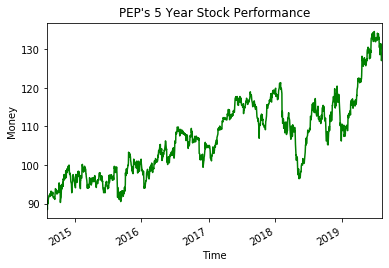

In [16]:
#Web Scrapes Current Miscellanous Data for Stock
def Miscellanous():
    miscellanous_search = 'https://finance.yahoo.com/quote/{0}?p={0}'.format(user_stock)

    currentMSource = requests.get(miscellanous_search).text

    currentMSoup = BeautifulSoup(currentMSource ,'lxml')

    currentMiscellanous = currentMSoup.find('table',class_ = 'W(100%) M(0) Bdcl(c)')

    miscellanous_search2 = 'https://www.marketwatch.com/investing/stock/{0}'.format(user_stock)

    currentMSource2 = requests.get(miscellanous_search2).text

    currentMSoup2 = BeautifulSoup(currentMSource2,'lxml')

    currentMiscellanous2 = currentMSoup2.find('ul', class_ = 'list list--kv list--col50')

    #Gets the Current Price

    currentMiscellnous3 = currentMSoup2.find('h3',class_ = 'intraday__price')
    currentPrice = currentMiscellnous3.find('bg-quote',class_ = 'value')

    #Today's Open Price

    TOPi = currentMiscellanous2.find('li', class_ = 'kv__item')
    TOP = TOPi.find('span', class_ = 'kv__value kv__primary')
    TOPe = str(TOP.text)
    TOPa = TOPe[1:]
    TodayOpenPrice = float(TOPa)

    #Web Scrapes the Current Market Cap

    CurrentMarketCap = currentMiscellanous.find('td',class_ = 'Ta(end) Fw(600) Lh(14px)')
    currentMarketCap = CurrentMarketCap.text

    #Web Scrapes Current Current Beta P/E Ratio
    currpeholder = []

    for pe in currentMiscellanous.find_all('td',class_ = 'Ta(end) Fw(600) Lh(14px)'):
        cpe = pe.text
        currpeholder.append(cpe)

    currentBeta = currpeholder[1]
    currentPE = currpeholder[2]

    currentEPS = currpeholder[3]
    currentEPS = float(currentEPS)

    try:
        currentDividend = currpeholder[5]
    except Exception:
        currentDividend = 0

    try: 
        divforpayout = currentDividend[0:3]
        divforpayout = float(divforpayout)
    except:
        divforpayout = 0

    currentPayoutRatio = round((divforpayout/currentEPS),3)

    #Gets 5 year graph

    d = datetime.datetime.today()
    current_year = str(d.year)
    current_month = str(d.month)
    current_day = str(d.day)
    global int_years_ago
    int_years_ago = int(current_year)
    five_years_ago = int_years_ago - 5
    fivers = str(five_years_ago)

    current_date = current_year +'/'+ current_month +'/'+ current_day
    five_years_current = fivers +'/'+ current_month +'/'+ current_day

    current_prices = dr.data.get_data_yahoo('{}'.format(user_stock), start = '{}'.format(five_years_current),end = '{}'.format(current_date))

    #Final Print

    print('This is {0} current price: '.format(user_stock)+ currentPrice.text)
    print("Today's Open Price: ", TodayOpenPrice)
    print("Market Cap: " + currentMarketCap)
    print('Current P/E Ratio: ' + currentPE)
    print('The current Beta: ' + currentBeta)
    print('Current EPS: ', currentEPS)
    print('Current Dividend and Yield: ' + currentDividend)
    print('Current Payout Ratio: ',currentPayoutRatio)

    current_prices.Open.plot(color = 'g')
    plt.ylabel('Money')
    plt.xlabel('Time')
    plt.title("{0}'s 5 Year Stock Performance".format(user_stock))
    
Miscellanous()

Do you want to see the Percent Growth or Raw Growth of Dividend Payouts: Percent Growth


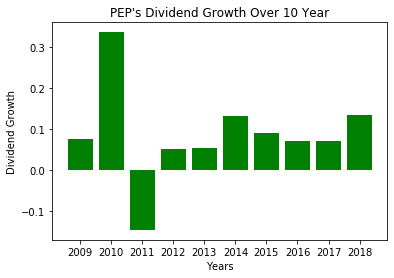

Five Ten Dividend Ratio:  1.1459291974009758
5 Year Dividend Growth Rate:  9.9116
10 Year Dividend Growth Rate:  8.6494
The stock you have chosen either has not paid dividend for at least 10 years or it pays dividends monthly, Dividend based calculations cannot be done


In [20]:
##WARNING does not work with Stonks that do not pay dividends(duh), doesn't work with monthly payers, or doesnt have at least 10 years of dividends
# Dividend Growth using Unix and datetime, gets the dates to webscrape for 5 and 10 year growth rates
def DividendGraphs():
    try:
        d69 = datetime.datetime.today()
        current_year = str(d69.year)
        N_int_years_ago = int(current_year)

        startYearDiv = N_int_years_ago 
        endYearDiv1 = N_int_years_ago - 6
        endYearDiv2 = N_int_years_ago - 11

        day_n_year_div = '/01/01'

        s_startYearDiv = str(startYearDiv) + day_n_year_div
        s_endYearDiv1 = str(endYearDiv1) + day_n_year_div
        s_endYearDiv2 = str(endYearDiv2) + day_n_year_div

        # Now convert Unix, and assigns new unix values 

        unix_startYearDiv = pd.datetime(startYearDiv,1,1)
        unix_endYearDiv1 = pd.datetime(endYearDiv1,1,1)
        unix_endYearDiv2 = pd.datetime(endYearDiv2,1,1)

        unixStart = int(unix_startYearDiv.replace(tzinfo=datetime.timezone.utc).timestamp())
        unixEnd1 = int(unix_endYearDiv1.replace(tzinfo=datetime.timezone.utc).timestamp())
        unixEnd2 = int(unix_endYearDiv2.replace(tzinfo=datetime.timezone.utc).timestamp())

        # Now webscrape yahoo finance dividend payment history

        dividend_search10year = 'https://finance.yahoo.com/quote/{2}/history?period1={1}&period2={0}&interval=div%7Csplit&filter=div&frequency=1mo'.format(unixStart,unixEnd2,user_stock)
        dividend_search5year = 'https://finance.yahoo.com/quote/{2}/history?period1={1}&period2={0}&interval=div%7Csplit&filter=div&frequency=1mo'.format(unixStart,unixEnd1,user_stock)

        dividend10_source = requests.get(dividend_search10year).text
        dividend10_soup = BeautifulSoup(dividend10_source,'lxml')

        ###Collects years for 10 years, then stores the individual years into a single list

        #This works below
        tenYearDivYears = []
        for i10 in dividend10_soup.find_all('td',class_ = 'Py(10px) Ta(start) Pend(10px)'):
            yearDiv = i10.text
            yearDiv = yearDiv[8:12]
            yearDiv = int(yearDiv)
            tenYearDivYears.append(yearDiv)

        #This works below, makes the repeting year into only one year then puts it into an array   
        count3 = 1
        colDivYear = []

        for i12 in range(0,len(tenYearDivYears)-1):
            if(tenYearDivYears[i12] > tenYearDivYears[count3]):
                colDivYear.append(tenYearDivYears[i12])
            count3 += 1

        lastYear = colDivYear[-1] - 1
        colDivYear.append(lastYear)
        #Collects dividend payout for 10 years

        #Works for companies that pay quarterly 
        tenYearDivPay = []
        count = 0
        for i11 in dividend10_soup.find_all('td',class_ = 'Ta(c) Py(10px) Pstart(10px)'):
            payDiv = i11.text
            payDiv = payDiv.split(' ')
            for i12 in payDiv:
                try:
                    if(count%2 == 0):
                        integer10yeardiv = float(i12)
                        tenYearDivPay.append(integer10yeardiv)
                except Exception:
                    tenYearDivPay.append(0)
                count += 1

        # This tells how many year entries in tenYearDivYear there are; i.e if 2018 shows up to 4 occassions of payouts,but 2017 has 5 occasions, this'll create a list that catches that based on index from latest year to oldest
        year10Counter = []
        for i13 in colDivYear:
            year10z = tenYearDivYears.count(i13)
            year10Counter.append(year10z)

        #Puts prices into a 2d array to summation that aligns with its corresponding easier
        x = []
        y = 0
        z = 0
        for i14 in year10Counter:
            z += i14
            x.append(tenYearDivPay[y:z])
            y +=i14

        # This upcoming for loop adds all of the 
        xx = []
        for i15 in x:
            a = np.array(i15).sum()
            a = round(a,3)
            xx.append(a)

        #Now to make a date frame that corresponds with its year of total payout, then use pandas to calculate the percent change
        #Reverse order to make into data frame from earliest year to newest year

        new_xx = xx[::-1]
        new_colDivYear = colDivYear[::-1]    

        tenYearDivDataFrame = pd.DataFrame({'Year':new_colDivYear,
                                          'Dividend_Payout':new_xx})
        percentChangetenYearDivDataFrame = tenYearDivDataFrame.pct_change()

        finalpercentChangetenYearDivDataFrame = percentChangetenYearDivDataFrame.dropna(how = 'all')

        final10YearDivCol = []

        for i16 in finalpercentChangetenYearDivDataFrame['Dividend_Payout']:
            i16 = i16*100
            i16 = round(i16,3)
            final10YearDivCol.append(i16)

        TenDivYearPercentChange = (np.array(final10YearDivCol).sum()/10)

        ### Now I gotta do the 5 year dividends, repeat of code for 10 year div data
        fiveYearAdj = [tenYearDivDataFrame['Dividend_Payout'][5],tenYearDivDataFrame['Dividend_Payout'][6],tenYearDivDataFrame['Dividend_Payout'][7],tenYearDivDataFrame['Dividend_Payout'][8],tenYearDivDataFrame['Dividend_Payout'][9],tenYearDivDataFrame['Dividend_Payout'][10]]
        fiveYearDivDataFrame = pd.DataFrame({'Dividend_Payout':fiveYearAdj})

        percentChangeFiveYearDivDataFrame = fiveYearDivDataFrame.pct_change()
        final_percentChangeFiveYearDivDataFrame = percentChangeFiveYearDivDataFrame.dropna(how = 'all')

        final5YearDivCol = []

        for i17 in final_percentChangeFiveYearDivDataFrame['Dividend_Payout']:
            i17 = i17*100
            i17 = round(i17,3)
            final5YearDivCol.append(i17)

        FiveDivSum = 0
        for i18 in final5YearDivCol:
            FiveDivSum += i18
            FiveDivSum = round(FiveDivSum,3)

        FiveDivYearPercentChange = FiveDivSum/5

        ###Final division for 5/10 ratio

        fiveTenRatio = FiveDivYearPercentChange/TenDivYearPercentChange

        #Shows a line graph of the stock's dividend payout over then 10 years and Important Dividend Growth stuff
        DividendRequest = input('Do you want to see the Percent Growth or Raw Growth of Dividend Payouts: ')

        if(DividendRequest == 'Raw Growth'):
            divYearGraphX = tenYearDivDataFrame['Year']
            divYearGraphY = tenYearDivDataFrame['Dividend_Payout']

            plt.plot(divYearGraphX,divYearGraphY,color = 'g')
            plt.title("{}'s Dividend Payout Over 10 Year".format(user_stock))
            plt.xlabel('Years')
            plt.ylabel('Dividend Payout')
            plt.show(block = True)

        else:
            DivGraphPercentX = tenYearDivDataFrame['Year'][1:]
            DivGraphPercentY = finalpercentChangetenYearDivDataFrame['Dividend_Payout']

            randall = []
            for i in DivGraphPercentX:
                i = str(i)
                randall.append(i)

            plt.bar(randall,DivGraphPercentY,color = 'g')
            plt.title("{}'s Dividend Growth Over 10 Year".format(user_stock))
            plt.xlabel('Years')
            plt.ylabel('Dividend Growth')
            plt.show(block = True)

        print('Five Ten Dividend Ratio: ',fiveTenRatio)
        print('5 Year Dividend Growth Rate: ',FiveDivYearPercentChange)
        print('10 Year Dividend Growth Rate: ',TenDivYearPercentChange)
        print('Current Dividend and Yield: ' + currentDividend)

    except Exception:
        print('The stock you have chosen either has not paid dividend for at least 10 years or it pays dividends monthly, Dividend based calculations cannot be done')
    
DividendGraphs()

What is the Start Time for Stock Prices (Use Year/Month/Day Format): 2018/07/05
What is the End Time for Stock Prices (Use Year/Month/Day Format): 2019/07/05
Do you want one graph or two graphs(type 1 or 2): 1
Do you want a timeseries graph based on: Open Prices, Closing Prices, High Prices, or Low Prices: Open Prices
Do you want the Data to be differently colored based by: Annually, Quarterly, Monthly, or None: None


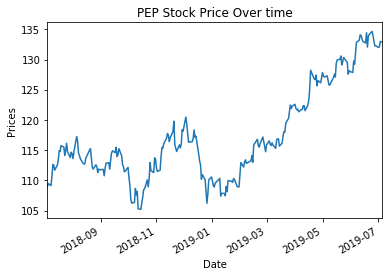

In [21]:
#Line Graph for Stock Prices Over Time
def StockPricesGraph():
    start_time = input('What is the Start Time for Stock Prices (Use Year/Month/Day Format): ') 
    end_time  = input('What is the End Time for Stock Prices (Use Year/Month/Day Format): ')

    start_time2 = pd.to_datetime(start_time,yearfirst = True)
    end_time2 = pd.to_datetime(start_time,yearfirst = True)

    start_time2 = str(start_time2)
    end_time2 = str(end_time2)

    stock_prices = dr.get_data_yahoo('{}'.format(user_stock), start = '{}'.format(start_time),end = '{}'.format(end_time))
    stock_prices

    price_graph_choice = input('Do you want one graph or two graphs(type 1 or 2): ')
    price_graph_choice = int(price_graph_choice)

    if(price_graph_choice == 2):
        user_stock_price_timeseries = input('Do you want a timeseries graph based on: Open Prices, Closing Prices, High Prices, or Low Prices: ')
        user_stock_price_timeseries2 = input('Do you want the 2nd timeseries graph based on: Open Prices, Closing Prices, High Prices, or Low Prices: ')
        user_stock_resampling = input('Do you want the Data to be differently colored based by: Annually, Quarterly, Monthly, or None: ')
    else:
        user_stock_price_timeseries = input('Do you want a timeseries graph based on: Open Prices, Closing Prices, High Prices, or Low Prices: ')
        user_stock_resampling = input('Do you want the Data to be differently colored based by: Annually, Quarterly, Monthly, or None: ')
        user_stock_price_timeseries2 = 0 # Have to do this in case user wants only one graph


    if(user_stock_resampling == 'Annually'):
        line_resample = 'A'
    elif(user_stock_resampling == 'Quarterly'):
        line_resample = 'Q'
    elif(user_stock_resampling == 'Monthly'):
        line_resample = 'M'
    else:
        line_resample = 'lol wut'


    class StockPriceLineGraph:
        def __init__(self,linePrice,lineResample):
            self.linePrice = linePrice
            self.lineResample = lineResample

        def OpenPrices(self):
            if((self.linePrice == 'Open Prices') and (self.lineResample == 'A')):
                return stock_prices.Open.resample(line_resample).plot(label = 'Open Prices')
            elif((self.linePrice == 'Open Prices') and (self.lineResample == 'Q')):
                return stock_prices.Open.resample(line_resample).plot(label = 'Open Prices')
            elif((self.linePrice == 'Open Prices') and (self.lineResample == 'M')):
                return stock_prices.Open.resample(line_resample).plot(label = 'Open Prices')
            else:
                return stock_prices.Open.plot(label = 'Open Prices')

        def ClosingPrices(self):
            if((self.linePrice == 'Closing Prices') and (self.lineResample == 'A')):
                return stock_prices.Close.resample(line_resample).plot(label = 'Closing Prices')
            elif((self.linePrice == 'Closing Prices') and (self.lineResample == 'Q')):
                return stock_prices.Close.resample(line_resample).plot(label = 'Closing Prices')
            elif((self.linePrice == 'Closing Prices') and (self.lineResample == 'M')):
                return stock_prices.Close.resample(line_resample).plot(label = 'Closing Prices')
            else:
                stock_prices.Open.plot(label = 'Closing Prices')

        def HighPrices(self):
            if((self.linePrice == 'High Prices') and (self.lineResample == 'A')):
                return stock_prices.High.resample(line_resample).plot(label = 'High Prices')
            elif((self.linePrice == 'High Prices') and (self.lineResample == 'Q')):
                return stock_prices.High.resample(line_resample).plot(label = 'High Prices')
            elif((self.linePrice == 'High Prices') and (self.lineResample == 'M')):
                return stock_prices.High.resample(line_resample).plot(label = 'High Prices')
            else:
                return stock_prices.High.plot(label = 'High Prices')

        def LowPrices(self):
            if((self.linePrice == 'Low Prices') and (self.lineResample == 'A')):
                return stock_prices.Low.resample(line_resample).plot(label = 'Low Prices')
            elif((self.linePrice == 'Low Prices') and (self.lineResample == 'Q')):
                return stock_prices.Low.resample(line_resample).plot(label = 'Low Prices')
            elif((self.linePrice == 'Low Prices') and (self.lineResample == 'M')):
                return stock_prices.Low.resample(line_resample).plot(label = 'Low Prices')
            else:
                return stock_prices.Low.plot(label = 'Low Prices')

    finalpricegraph1 = StockPriceLineGraph(user_stock_price_timeseries,line_resample)

    finalpricegraph2 = 0 # Have to use this in case user wants one graph
    finalpricegraph2 = StockPriceLineGraph(user_stock_price_timeseries2,line_resample)

    #Time and Price axies and title, x = user_stock

    prc_dec = pricegraph_dec(user_stock)

    #Final Graph execution

    if(price_graph_choice == 1):
        if(user_stock_price_timeseries == 'Open Prices'):
            finalpricegraph1.OpenPrices()
            prc_dec
        elif(user_stock_price_timeseries == 'High Prices'):
            finalpricegraph1.HighPrices()
            prc_dec
        elif(user_stock_price_timeseries == 'Closing Prices'):
            finalpricegraph1.ClosingPrices()
            prc_dec
        else:
            finalpricegraph1.LowPrices()
            prc_dec
    elif(price_graph_choice == 2):
        if((user_stock_price_timeseries == 'Open Prices' ) and (user_stock_price_timeseries2 == 'Closing Prices')):
            finalpricegraph1.OpenPrices()
            finalpricegraph2.ClosingPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        elif((user_stock_price_timeseries == 'Open Prices') and (user_stock_price_timeseries2 == 'High Prices')):
            finalpricegraph1.OpenPrices()
            finalpricegraph2.HighPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        elif((user_stock_price_timeseries == 'Open Prices') and (user_stock_price_timeseries2 == 'Low Prices')):
            finalpricegraph1.OpenPrices()
            finalpricegraph2.LowPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        elif((user_stock_price_timeseries == 'Closing Prices' ) and (user_stock_price_timeseries2 == 'Open Prices')):
            finalpricegraph1.ClosingPrices()
            finalpricegraph2.OpenPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        elif((user_stock_price_timeseries == 'Closing Prices' ) and (user_stock_price_timeseries2 == 'High Prices')):
            finalpricegraph1.ClosingPrices()
            finalpricegraph2.HighPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        elif((user_stock_price_timeseries == 'Closing Prices' ) and (user_stock_price_timeseries2 == 'Low Prices')):
            finalpricegraph1.ClosingPrices()
            finalpricegraph2.LowPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        elif((user_stock_price_timeseries == 'High Prices') and (user_stock_price_timeseries2 == 'Open Prices')):
            finalpricegraph1.HighPrices()
            finalpricegraph2.OpenPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        elif((user_stock_price_timeseries == 'High Prices') and (user_stock_price_timeseries2 == 'Closing Prices')):
            finalpricegraph1.HighPrices()
            finalpricegraph2.ClosingPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        elif((user_stock_price_timeseries == 'High Prices') and (user_stock_price_timeseries2 == 'Low Prices')):
            finalpricegraph1.HighPrices()
            finalpricegraph2.LowPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        elif((user_stock_price_timeseries == 'Low Prices') and (user_stock_price_timeseries2 == 'Open Prices')):
            finalpricegraph1.LowPrices()
            finalpricegraph2.OpenPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        elif((user_stock_price_timeseries == 'Low Prices') and (user_stock_price_timeseries2 == 'Closing Prices')):
            finalpricegraph1.LowPrices()
            finalpricegraph2.ClosingPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        elif((user_stock_price_timeseries == 'Low Prices') and (user_stock_price_timeseries2 == 'High Prices')):
            finalpricegraph1.LowPrices()
            finalpricegraph2.HighPrices()
            prc_dec
            plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
        else:
            print('oof, I think you not want to see one kind of pricing graph')
            
            
StockPricesGraph()


Do you want a graph based on (Accounts Payable vs. Net Receivable, Accounts Payable (Only), Accounts Receivable (Only),Inventory,Short Term Debt (Only), Long Term Debt (Only),Stock Holder Equity, Short Term Debt vs. Long Term Debt,Cash and Equivalents, Current Assets (Only), Total Assets (Only), Total Assets and Current Assets, Current Liabilities (Only), Total Liabilities (Only), Current Liabilities and Total Liabilities, Current Ratio, Debt Ratio, Total Liabilities vs. Total Assets, Current Liabilities vs. Current Assets: Total Assets (Only)


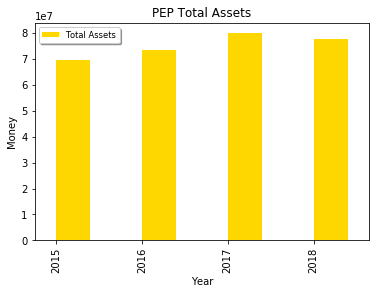

In [22]:
#Graphs based for the Balance Sheet
#Defining variables
def BalanceSheetGraph():
    tYear = t_years.year
    balance_sheet_for_graphs = balance_sheet_dataframe.set_index(tYear)
    balance_sheet_for_graphs = balance_sheet_for_graphs[::-1]

    #The Graphs for balance sheet

    balance_sheet_response = input('Do you want a graph based on (Accounts Payable vs. Net Receivable, Accounts Payable (Only), Accounts Receivable (Only),Inventory,Short Term Debt (Only), Long Term Debt (Only),Stock Holder Equity, Short Term Debt vs. Long Term Debt,Cash and Equivalents, Current Assets (Only), Total Assets (Only), Total Assets and Current Assets, Current Liabilities (Only), Total Liabilities (Only), Current Liabilities and Total Liabilities, Current Ratio, Debt Ratio, Total Liabilities vs. Total Assets, Current Liabilities vs. Current Assets: ')

    if(balance_sheet_response == 'Accounts Payable vs. Net Receivable'):
        balance_sheet_for_graphs.Accounts_Payble.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Accounts Payable')
        balance_sheet_for_graphs.Net_Receivables.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Net Receivables')
        plt.title('{} '.format(user_stock) + 'Accounts Payable VS. Net Receivable')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Accounts Payable (Only)'):
        balance_sheet_for_graphs.Accounts_Payble.plot(kind = 'bar', position = 1,color = 'gold',width = .4,label = 'Accounts Payable')
        plt.title('{} '.format(user_stock) + 'Accounts Payable')
        plt.xlabel('Year')
        plt.ylabel('Year')
        plt.legend(loc = 'best',shadow = True)
    elif(balance_sheet_response == 'Accounts Receivable (Only)'):
        balance_sheet_for_graphs.Net_Receivables.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Net Receivables')
        plt.title('{} '.format(user_stock) + 'Net Receivable')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Inventory'):
        balance_sheet_for_graphs.Inventory.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Inventory')
        plt.title('{} '.format(user_stock) + 'Inventory')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Short Term Debt (Only)'):
        balance_sheet_for_graphs.Short_Term_Debt.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Short Term Debt')
        plt.title('{} '.format(user_stock) + 'Short Term Debt')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Long Term Debt (Only)'):
        balance_sheet_for_graphs.Long_Term_Debt.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Long Term Debt')
        plt.title('{} '.format(user_stock) +'Long Term Debt')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == "Stock Holder Equity"):
        balance_sheet_for_graphs.Total_Stockholder_Equity.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Stock Holder's Equity")
        plt.title('{} '.format(user_stock) +"Stock Holder's Equity")
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Short Term Debt vs. Long Term Debt'):
        balance_sheet_for_graphs.Short_Term_Debt.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Short Term Debt')
        balance_sheet_for_graphs.Long_Term_Debt.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Long Term Debt')
        plt.title('{} '.format(user_stock) + 'Short Term Debt VS. Long Term Debt')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Cash and Equivalents'):
        balance_sheet_for_graphs.Cash_and_Equivalents.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Cash and Equivalents")
        plt.title('{} '.format(user_stock) +"Cash and Equivalents")
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Current Assets (Only)'):
        balance_sheet_for_graphs.Current_Assets.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Current Assets")
        plt.title('{} '.format(user_stock) +"Current Assets")
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Total Assets (Only)'):
        balance_sheet_for_graphs.Total_Assets.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Total Assets")
        plt.title('{} '.format(user_stock) +"Total Assets")
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Total Assets and Current Assets'):
        balance_sheet_for_graphs.Total_Assets.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Total Assets')
        balance_sheet_for_graphs.Current_Assets.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Current Assets')
        plt.title('{} '.format(user_stock) + 'Total Assets and Current Assets')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Current Liabilities (Only)'):
        balance_sheet_for_graphs.Current_Liabilities.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Current Liabilities")
        plt.title('{} '.format(user_stock) +"Current Liabilities")
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Total Liabilities (Only)'):
        balance_sheet_for_graphs.Total_Liabilities.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Total Liabilities")
        plt.title('{} '.format(user_stock) +"Total Liabilities")
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Current Liabilities and Total Liabilities'):
        balance_sheet_for_graphs.Total_Liabilities.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Total Liabilities')
        balance_sheet_for_graphs.Current_Liabilities.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Current Liabilities')
        plt.title('{} '.format(user_stock) + 'Current Liabilities and Total Liabilities')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Current Ratio'):
        balance_sheet_for_graphs.Current_Ratio.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Current Ratio')
        plt.title('{} '.format(user_stock) + 'Current Ratio')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Debt Ratio'):
        balance_sheet_for_graphs.Debt_Ratio.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Debt Ratio')
        plt.title('{} '.format(user_stock) + 'Debt Ratio')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Total Liabilities vs. Total Assets'):
        balance_sheet_for_graphs.Total_Liabilities.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Total Liabilities')
        balance_sheet_for_graphs.Total_Assets.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Total Assets')
        plt.title('{} '.format(user_stock) + 'Total Liabilities vs. Total Assets')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    elif(balance_sheet_response == 'Current Liabilities vs. Current Assets'):
        balance_sheet_for_graphs.Current_Liabilities.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Current Liabilities')
        balance_sheet_for_graphs.Current_Assets.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Current Assets')
        plt.title('{} '.format(user_stock) + 'Current Liabilities vs. Current Assets')
        plt.xlabel('Year')
        plt.ylabel('Money')
        plt.legend(loc = 'best',shadow = True,fontsize = 'small')
    else:
        pass
    
BalanceSheetGraph()

Do you want Quarter or Annual Graphs of PEP: Annual
Do you want the Graph to be based off Raw Numbers or Percent Changes: Raw Numbers
Do you want a Graph about: Gross Profit, Total Revenue, Net Income, Operating Income or Loss, Net Income Continuing Ops, Cost of Goods Sold, Net Profit Margin, Gross Profit Margin, or Operting Profit Margin: Net Income


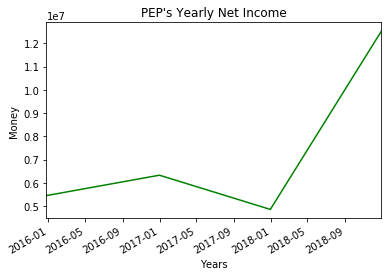

In [23]:
#Graphs for Income Statement(Line Graphs)
def IncomeStatementGraph():
    IncomeStatement_GraphsResponse = input("Do you want Quarter or Annual Graphs of {0}: ".format(user_stock))
    IncomeStatementGraph_PercentQuestion = input('Do you want the Graph to be based off Raw Numbers or Percent Changes: ')

    if(IncomeStatement_GraphsResponse == 'Annual'):
        IncomeStatement_GraphChoiceA = input('Do you want a Graph about: Gross Profit, Total Revenue, Net Income, Operating Income or Loss, Net Income Continuing Ops, Cost of Goods Sold, Net Profit Margin, Gross Profit Margin, or Operting Profit Margin: ')
        IncomeStatement_GraphChoiceQ  = 'Nothing'
    elif(IncomeStatement_GraphsResponse == 'Quarter'):
        IncomeStatement_GraphChoiceA = 'Nothing'
        IncomeStatement_GraphChoiceQ = input('Do you want a Graph about: Gross Profit, Total Revenue, Net Income, Net Profit Margin, Gross Profit Margin, or Cost of Goods Sold: ')

    IncomeStatementGraphADataFrame = Income_StatementA.set_index('Years')
    IncomeStatementGraphQDataFrame = Income_StatementQ.set_index('Years')

    IncomeStatementGraphADataFrame = IncomeStatementGraphADataFrame[::-1]
    IncomeStatementGraphQDataFrame = IncomeStatementGraphQDataFrame[::-1]

    PercentIncomeStatementGraphQDataFrame = IncomeStatementGraphQDataFrame.pct_change()
    PercentIncomeStatementGraphADataFrame = IncomeStatementGraphADataFrame.pct_change()

    PercentIncomeStatementGraphQDataFrame = PercentIncomeStatementGraphQDataFrame.dropna(how = 'all')
    PercentIncomeStatementGraphADataFrame = PercentIncomeStatementGraphADataFrame.dropna(how = 'all')

    if((IncomeStatement_GraphsResponse == 'Quarter') and (IncomeStatementGraph_PercentQuestion == 'Raw Numbers')):
        if(IncomeStatement_GraphChoiceQ == 'Gross Profit'):
            IncomeStatementGraphQDataFrame.Gross_Profit.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Gross Profit".format(user_stock))
        elif(IncomeStatement_GraphChoiceQ  == 'Total Revenue'):
            IncomeStatementGraphQDataFrame.Total_Revenue.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Total Revenue".format(user_stock))
        elif(IncomeStatement_GraphChoiceQ == 'Net Income'):
            IncomeStatementGraphQDataFrame.Net_Income.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Net Income".format(user_stock))
        elif(IncomeStatement_GraphChoiceQ == 'Net Profit Margin'):
            IncomeStatementGraphQDataFrame.Net_Profit_Margin.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Net Profit Margin".format(user_stock))
        elif(IncomeStatement_GraphChoiceQ == 'Gross Profit Margin'):
            IncomeStatementGraphQDataFrame.Gross_Profit_Margin.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Gross Profit Margin".format(user_stock))
        elif(IncomeStatement_GraphChoiceQ == 'Cost of Goods Sold'):
            IncomeStatementGraphQDataFrame.Cost_of_Goods_Sold.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Cost of Goods Sold".format(user_stock))
    elif((IncomeStatement_GraphsResponse == 'Annual') and (IncomeStatementGraph_PercentQuestion == 'Raw Numbers')):
        if(IncomeStatement_GraphChoiceA == 'Gross Profit'):
            IncomeStatementGraphADataFrame.Gross_Profit.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Gross Profit".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Total Revenue'):
            IncomeStatementGraphADataFrame.Total_Revenue.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Gross Profit".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Net Income'):
            IncomeStatementGraphADataFrame.Net_Income.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Net Income".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Operating Income or Loss'):
            IncomeStatementGraphADataFrame.Operating_Income_or_Loss.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Operating Income or Loss".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Net Income Continuing Ops'):
            IncomeStatement_GraphChoiceA.Net_Income_Continuing_Ops.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Net Income Continuing Ops".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Cost of Goods Sold'):
            IncomeStatement_GraphChoiceA.Cost_of_Goods_Sold.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Cost of Goods Sold".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Net Profit Margin'):
            IncomeStatement_GraphChoiceA.Net_Profit_Margin.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Net Profit Margin".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Gross Profit Margin'):
            IncomeStatement_GraphChoiceA.Gross_Profit_Margin.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Gross Profit Margin".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Operting Profit Margin'):
            IncomeStatement_GraphChoiceA.Operting_Profit_Margin.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Money')
            plt.title("{0}'s Yearly Opearing Profit Margin".format(user_stock))
    elif((IncomeStatement_GraphsResponse == 'Quarter') and (IncomeStatementGraph_PercentQuestion == 'Percent Changes')):
        if(IncomeStatement_GraphChoiceQ == 'Gross Profit'):
            PercentIncomeStatementGraphQDataFrame.Gross_Profit.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Quarterly Gross Profit".format(user_stock))
        elif(IncomeStatement_GraphChoiceQ == 'Total Revenue'):
            PercentIncomeStatementGraphQDataFrame.Total_Revenue.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Quarterly Total Revenue".format(user_stock))
        elif(IncomeStatement_GraphChoiceQ == 'Net Income'):
            PercentIncomeStatementGraphQDataFrame.Net_Income.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Quarterly Net Income".format(user_stock))
        elif(IncomeStatement_GraphChoiceQ == 'Net Profit Margin'):
            PercentIncomeStatementGraphQDataFrame.Net_Profit_Margin.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Quarterly Net Profit Margin".format(user_stock))
        elif(IncomeStatement_GraphChoiceQ == 'Gross Profit Margin'):
            PercentIncomeStatementGraphQDataFrame.Gross_Profit_Margin.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Quarterly Gross Profit Margin".format(user_stock))
        elif(IncomeStatement_GraphChoiceQ == 'Cost of Goods Sold'):
            PercentIncomeStatementGraphQDataFrame.Cost_of_Goods_Sold.plot(color = 'g')
            plt.xlabel('Quarters')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Quarterly Cost of Goods Sold".format(user_stock))
    elif((IncomeStatement_GraphsResponse == 'Annual') and (IncomeStatementGraph_PercentQuestion == 'Percent Changes')):
        if(IncomeStatement_GraphChoiceA == 'Gross Profit'):
            PercentIncomeStatementGraphADataFrame.Gross_Profit.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Yearly Gross Profit".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Total Revenue'):
            PercentIncomeStatementGraphADataFrame.Total_Revenue.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Yearly Total Revenue".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Net Income'):
            PercentIncomeStatementGraphADataFrame.Net_Income.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Yearly Net Income".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Operating Income or Loss'):
            PercentIncomeStatementGraphADataFrame.Operating_Income_or_Loss.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Yearly Operating Income or Loss".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Net Income Continuing Ops'):
            PercentIncomeStatementGraphADataFrame.Net_Income_Continuing_Ops.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Yearly Net Income Continuing Ops".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Cost of Goods Sold'):
            PercentIncomeStatementGraphADataFrame.Cost_of_Goods_Sold.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Yearly Cost of Goods Sold".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Net Profit Margin'):
            PercentIncomeStatementGraphADataFrame.Net_Profit_Margin.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Yearly Net Profit Margin".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Gross Profit Margin'):
            PercentIncomeStatementGraphADataFrame.Gross_Profit_Margin.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Yearly Gross Profit Margin".format(user_stock))
        elif(IncomeStatement_GraphChoiceA == 'Operting Profit Margin'):
            PercentIncomeStatementGraphADataFrame.Operating_Profit_Margin.plot(color = 'g')
            plt.xlabel('Years')
            plt.ylabel('Percent Changes')
            plt.title("{0}'s Yearly Operating Profit Margin".format(user_stock))
    else:
        pass

IncomeStatementGraph()

Do you want to see: Cash Flow from Operating Activaties or Dividends Paid: Dividends Paid


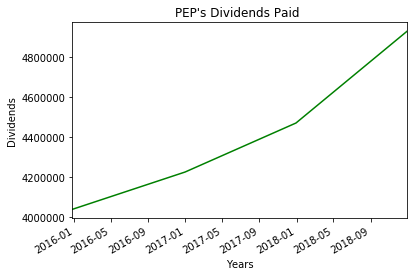

In [24]:
#CashFlow Graph 

def cashFlowGraph():
    cashFlowInput = input('Do you want to see: Cash Flow from Operating Activaties or Dividends Paid: ')

    cf_dataframe = cash_flow_dataframe.set_index('Years')
    cf_dataframe = cf_dataframe[::-1]

    if(cashFlowInput == 'Cash Flow from Operating Activaties'):
        cf_dataframe.Cash_Flow_Operating_Act.plot(color = 'g')
        plt.xlabel('Years')
        plt.ylabel('Cash Flow')
        plt.title("{0}'s Cash Flow from Operating Activities'")
    elif(cashFlowInput == 'Dividends Paid'):
        cf_dataframe.Dividends_Payed.plot(color = 'g')
        plt.xlabel('Years')
        plt.ylabel('Dividends')
        plt.title("{0}'s Dividends Paid ".format(user_stock))
    else:
        pass
    
cashFlowGraph()

Pick a Dividend Paying Stock's Ticker Symbol: pep
What Information do you want to know about PEP stock: Balance Sheet, Cash Flow, Stock Price, Income Statement, or Dividends Balance Sheet
Do you want a graph based on (Accounts Payable vs. Net Receivable, Accounts Payable (Only), Accounts Receivable (Only),Inventory,Short Term Debt (Only), Long Term Debt (Only),Stock Holder Equity, Short Term Debt vs. Long Term Debt,Cash and Equivalents, Current Assets (Only), Total Assets (Only), Total Assets and Current Assets, Current Liabilities (Only), Total Liabilities (Only), Current Liabilities and Total Liabilities, Current Ratio, Debt Ratio, Total Liabilities vs. Total Assets, Current Liabilities vs. Current Assets: Current Liabilities vs. Current Assets


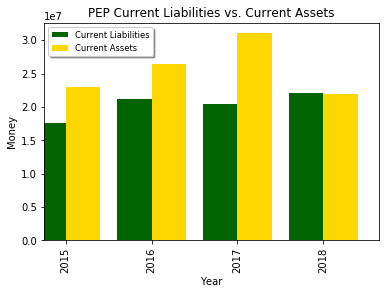

In [27]:
def Main():
    #Get's the Stock Sticker the user wants
    stock = input("Pick a Dividend Paying Stock's Ticker Symbol: ")
    #Make if else statement that only accepts kings or aristocrates
    stock = stock.upper()

    user_request_graph = input('What Information do you want to know about {0} stock: Balance Sheet, Cash Flow, Stock Price, Income Statement, or Dividends '.format(stock))

    if(user_request_graph == 'Balance Sheet'):
        return BalanceSheetGraph()
    elif(user_request_graph == 'Cash Flow'):
        return cashFlowGraph()
    elif(user_request_graph == 'Stock Price'):
        return StockPricesGraph()
    elif(user_request_graph == 'Income Statement'):
        return IncomeStatementGraph()
    elif(user_request_graph == 'Dividends'):
        return DividendGraphs()
    else:
        pass
        
final_backend = Main()

final_backend

    
